In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [3]:
%pwd

'/Volumes/GoogleDrive/My Drive/DATAMITES/CONTENT/CORE/CDS/CDS_scripts/PR0012-ITSM-Disclosure'

In [19]:
date_parser = lambda c: pd.to_datetime(c, format='%d/%m/%Y %H:%M:%S', errors='coerce')
data = pd.read_csv('ITSM_data.csv', 
                   parse_dates=['Open_Time','Reopen_Time','Close_Time','Resolved_Time'])

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 26 columns):
CI_Name                       46606 non-null object
CI_Cat                        46495 non-null object
CI_Subcat                     46495 non-null object
WBS                           46606 non-null object
Incident_ID                   46606 non-null object
Status                        46606 non-null object
Impact                        46606 non-null object
Urgency                       46606 non-null object
Priority                      45226 non-null float64
Unnamed: 9                    46606 non-null float64
Category                      46606 non-null object
KB_number                     46606 non-null object
Alert_Status                  46606 non-null object
No_of_Reassignments           46605 non-null float64
Unnamed: 14                   46606 non-null int64
Open_Time                     46606 non-null datetime64[ns]
Reopen_Time                   2284 non-null datet

In [21]:
selected = data.loc[:,['Open_Time','Incident_ID','CI_Name','CI_Cat','CI_Subcat','WBS','Category','Priority']]

In [22]:
selected.isnull().sum()

Open_Time         0
Incident_ID       0
CI_Name           0
CI_Cat          111
CI_Subcat       111
WBS               0
Category          0
Priority       1380
dtype: int64

In [23]:
selected.dropna(inplace=True)

In [24]:
selected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45118 entries, 0 to 46605
Data columns (total 8 columns):
Open_Time      45118 non-null datetime64[ns]
Incident_ID    45118 non-null object
CI_Name        45118 non-null object
CI_Cat         45118 non-null object
CI_Subcat      45118 non-null object
WBS            45118 non-null object
Category       45118 non-null object
Priority       45118 non-null float64
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 3.1+ MB


In [25]:
selected['Date'] = selected['Open_Time'].apply(lambda x: x.date() )

In [26]:
selected.Date[0]

datetime.date(2012, 5, 2)

In [27]:
selected['No_Incidents']=selected.groupby('Date')['Incident_ID'].transform('count')

In [28]:
incfrq = selected.loc[:,['Date','No_Incidents']]

In [29]:
incfrq.head()

,Date,No_Incidents
0,2012-05-02,1
1,2012-12-03,1
3,2012-07-17,1
4,2012-10-08,2
5,2012-10-08,2


In [30]:
incfrq.drop_duplicates(inplace=True)

In [31]:
incfrq.shape

(326, 2)

In [32]:
incfrq.head()

,Date,No_Incidents
0,2012-05-02,1
1,2012-12-03,1
3,2012-07-17,1
4,2012-10-08,2
6,2012-08-15,1


In [33]:
incfrq = incfrq.set_index('Date')
incfrq.index = pd.to_datetime(incfrq.index)
incfrq.index

DatetimeIndex(['2012-05-02', '2012-12-03', '2012-07-17', '2012-10-08',
               '2012-08-15', '2012-08-22', '2012-03-09', '2012-09-21',
               '2012-01-10', '2012-02-10',
               ...
               '2014-03-22', '2014-03-24', '2014-03-23', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31'],
              dtype='datetime64[ns]', name='Date', length=326, freq=None)

In [34]:
incfrq.head()

,No_Incidents
Date,
2012-05-02,1
2012-12-03,1
2012-07-17,1
2012-10-08,2
2012-08-15,1


In [35]:
print(incfrq.index.min(),"to",incfrq.index.max())

2012-01-10 00:00:00 to 2014-12-03 00:00:00


In [36]:
data = incfrq['No_Incidents']
data = data.asfreq('D')
data.index

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06', '2012-05-07', '2012-05-08', '2012-05-09',
               '2012-05-10', '2012-05-11',
               ...
               '2014-03-22', '2014-03-23', '2014-03-24', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31'],
              dtype='datetime64[ns]', name='Date', length=699, freq='D')

In [37]:
data.head()

Date
2012-05-02    1.0
2012-05-03    NaN
2012-05-04    NaN
2012-05-05    NaN
2012-05-06    NaN
Freq: D, Name: No_Incidents, dtype: float64

In [38]:
data.head()

Date
2012-05-02    1.0
2012-05-03    NaN
2012-05-04    NaN
2012-05-05    NaN
2012-05-06    NaN
Freq: D, Name: No_Incidents, dtype: float64

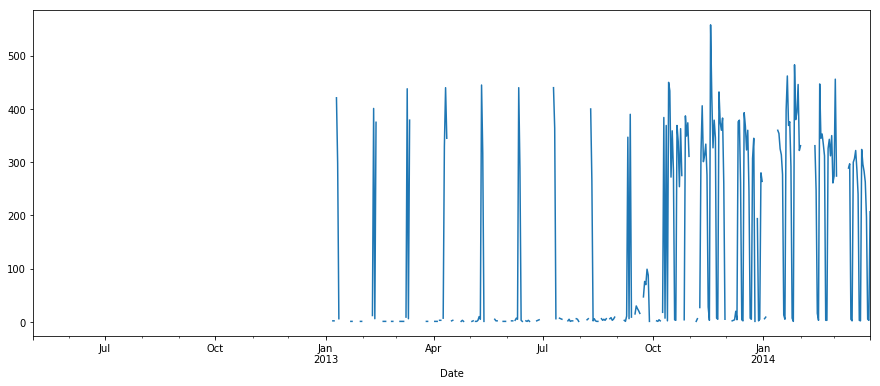

In [39]:
data.plot(figsize=(15, 6))
plt.show()

In [40]:
incfrom2013 = incfrq[incfrq.index > dt.datetime(2013,10,1)]

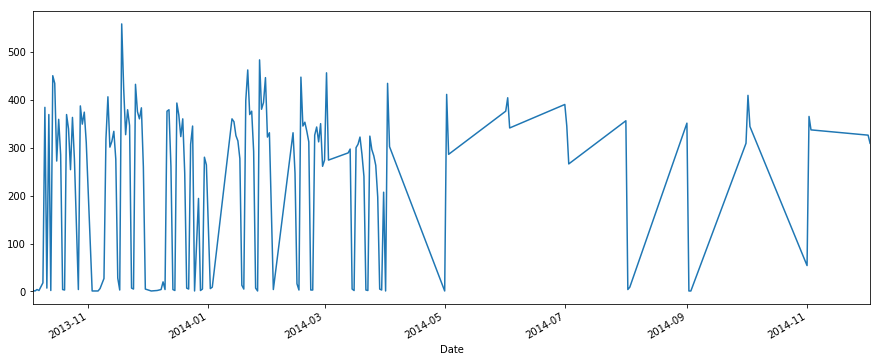

In [41]:
data= incfrom2013['No_Incidents']
data.plot(figsize=(15, 6))
plt.show()

In [42]:
data = data.asfreq('D')
data.index

DatetimeIndex(['2013-11-03', '2013-11-04', '2013-11-05', '2013-11-06',
               '2013-11-07', '2013-11-08', '2013-11-09', '2013-11-10',
               '2013-11-11', '2013-11-12',
               ...
               '2014-03-22', '2014-03-23', '2014-03-24', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31'],
              dtype='datetime64[ns]', name='Date', length=149, freq='D')

In [43]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [44]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
            mod = sm.tsa.statespace.SARIMAX(data,
                                            order=param,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{} - AIC:{}'.format(param, results.aic))

ARIMA(0, 0, 0) - AIC:1564.6056475451178
ARIMA(0, 0, 1) - AIC:1481.7002859631866
ARIMA(0, 1, 0) - AIC:1474.7870772466108
ARIMA(0, 1, 1) - AIC:1460.1805392729966
ARIMA(1, 0, 0) - AIC:1461.14635186134
ARIMA(1, 0, 1) - AIC:1459.390753848027
ARIMA(1, 1, 0) - AIC:1476.3000565754742
ARIMA(1, 1, 1) - AIC:1443.6710278802943


In [45]:
mod = sm.tsa.statespace.SARIMAX(data,order=(1, 1, 1))

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4416      0.132      3.333      0.001       0.182       0.701
ma.L1         -0.9995      0.843     -1.186      0.236      -2.651       0.652
sigma2      2.276e+04   2.04e+04      1.118      0.263   -1.71e+04    6.27e+04


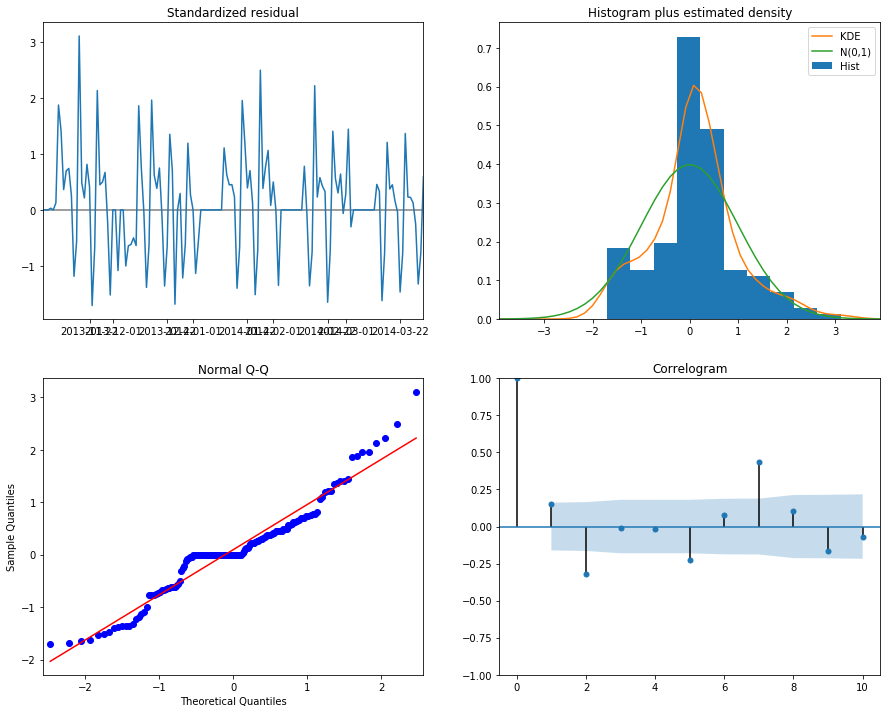

In [46]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [50]:
pred = results.get_prediction(start=pd.to_datetime('2014-2-3'), end=pd.to_datetime('2014-3-30'),dynamic=False)
pred_ci = pred.conf_int()

In [51]:
pred_ci

,lower No_Incidents,upper No_Incidents
Date,,
2014-02-03,-97.918849,555.252892
2014-02-04,-185.015674,409.777013
2014-02-05,-166.278173,486.752508
2014-02-06,-151.140287,513.877590
2014-02-07,-143.235235,524.634147
2014-02-08,-139.511369,529.150489
2014-02-09,-137.821846,531.099506
2014-02-10,-137.067062,531.951354
2014-02-11,-136.732116,532.325831


In [48]:
pred.predicted_mean.round()

Date
2014-02-03    229.0
2014-02-04    112.0
2014-02-05    160.0
2014-02-06    181.0
2014-02-07    191.0
2014-02-08    195.0
2014-02-09    197.0
2014-02-10    197.0
2014-02-11    198.0
2014-02-12    198.0
2014-02-13    198.0
2014-02-14    259.0
2014-02-15    222.0
2014-02-16    117.0
2014-02-17    110.0
2014-02-18    310.0
2014-02-19    266.0
2014-02-20    270.0
2014-02-21    262.0
2014-02-22    253.0
2014-02-23    114.0
2014-02-24    113.0
2014-02-25    258.0
2014-02-26    266.0
2014-02-27    253.0
2014-02-28    271.0
2014-03-01    231.0
2014-03-02    237.0
2014-03-03    320.0
2014-03-04    239.0
2014-03-05    224.0
2014-03-06    217.0
2014-03-07    214.0
2014-03-08    212.0
2014-03-09    212.0
2014-03-10    212.0
2014-03-11    212.0
2014-03-12    211.0
2014-03-13    211.0
2014-03-14    247.0
2014-03-15    251.0
2014-03-16    120.0
2014-03-17    117.0
2014-03-18    250.0
2014-03-19    254.0
2014-03-20    261.0
2014-03-21    246.0
2014-03-22    225.0
2014-03-23    119.0
2014-03-24    1

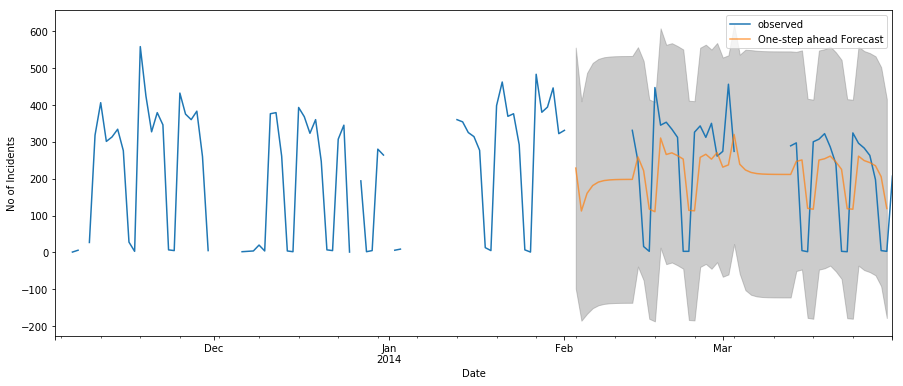

In [49]:
ax = data['2013':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7,figsize=(15, 6))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='grey', alpha=.4)

ax.set_xlabel('Date')
ax.set_ylabel('No of Incidents')
plt.legend()

plt.show()